Hola **Elias**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

#### Pureba A/B

### Instrucciones para completar la tarea

1. **Describe los objetivos del estudio.**
   - Explica cuál es el propósito del análisis y qué se espera lograr con la prueba A/B.

2. **Explora los datos:**
   - ¿Es necesario convertir los tipos de datos?
   - ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?

3. **Lleva a cabo el análisis exploratorio de datos (EDA):**
   - Estudia la conversión en las diferentes etapas del embudo.
   - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
   - ¿Hay usuarios que están presentes en ambas muestras?
   - ¿Cómo se distribuye el número de eventos entre los días?
   - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

4. **Evaluar los resultados de la prueba A/B:**
   - ¿Qué puedes decir sobre los resultados de la prueba A/B?
   - Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.

5. **Describe tus conclusiones:**
   - Resume los hallazgos del análisis exploratorio de datos (EDA).
   - Interpreta los resultados de la prueba A/B y proporciona recomendaciones basadas en los datos.

1. **Describe los objetivos del estudio.**
   - Explica cuál es el propósito del análisis y qué se espera lograr con la prueba A/B.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats




def looks(datos):
    """Genera un análisis de todo el set de datos de manera global"""

    print("Se ejecuta la descripción de los datos:")
    print(datos.describe(include="all"))
    print()
    print("se hace exploración con método info:")
    print(datos.info())
    print()
    print("se hace una observación con el método Sample:")
    if len(datos) > 10:
        print(datos.sample(10))
    else:
        print(datos)
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

In [2]:
marketing_events = pd.read_csv('datasets/ab_project_marketing_events_us.csv')
looks(marketing_events)

Se ejecuta la descripción de los datos:
                            name regions    start_dt   finish_dt
count                         14      14          14          14
unique                        14       6          14          14
top     Christmas&New Year Promo    APAC  2020-12-25  2021-01-03
freq                           1       4           1           1

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
None

se hace una observación con el método Sample:
                                name                   regions    start_dt  \
11     Dragon Boat Festival Giveaway                      APAC  2020-06-25   
8    Int

In [3]:
new_users = pd.read_csv('datasets/final_ab_new_users_upd_us.csv')
looks(new_users)

Se ejecuta la descripción de los datos:
                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     8F04273BB2860229  2020-12-21     EU  Android
freq                   1        6077  43396    26159

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None

se hace una observación con el método Sample:
                user_id  first_date region   device
39760  02232A0431F12001  2020-12-11    CIS  Android
23933  2145A69F612435A5  2020-12-22     EU       PC
2257   58EEC929BEEB234B  2020-12-07     EU  Android
52408  C5

In [4]:
events = pd.read_csv('datasets/final_ab_events_upd_us.csv')
looks(events)

Se ejecuta la descripción de los datos:
                 user_id             event_dt event_name       details
count             423761               423761     423761  60314.000000
unique             58703               257138          4           NaN
top     A3917F81482141F2  2020-12-14 18:54:55      login           NaN
freq                  36                   10     182465           NaN
mean                 NaN                  NaN        NaN     23.881219
std                  NaN                  NaN        NaN     72.228884
min                  NaN                  NaN        NaN      4.990000
25%                  NaN                  NaN        NaN      4.990000
50%                  NaN                  NaN        NaN      4.990000
75%                  NaN                  NaN        NaN      9.990000
max                  NaN                  NaN        NaN    499.990000

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to

In [5]:
participants = pd.read_csv('datasets/final_ab_participants_upd_us.csv')
looks(participants)

Se ejecuta la descripción de los datos:
                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     FABB6D49B11E673F      A  interface_eu_test
freq                   2   8214              10850

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None

se hace una observación con el método Sample:
                user_id group                  ab_test
10468  5BFA74215A83EE89     B        interface_eu_test
5297   05DFF348C4BE7B60     B        interface_eu_test
11928  40AB8FB3D0C2C032     A        interface_eu_test
332    3D1A366EDDC82832     A  recommender_system_test
3047 

### No se encuentras particulatidades especiales para los datos 

In [6]:
# Convertir fechas a datetime
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
events['event_dt'] = pd.to_datetime(events['event_dt'])
events["event_date"] = events["event_dt"].dt.date
marketing_events[['start_dt', 'finish_dt']] = marketing_events[[
    'start_dt', 'finish_dt']].apply(pd.to_datetime)



# # Filtrar eventos dentro del período de la prueba (07/12/2020 - 01/01/2021)

# events = events[(events['event_dt'] >= '2020-12-07') &

#                 (events['event_dt'] <= '2021-01-01')]



# Unir eventos con información de grupos


df = events.merge(participants, on='user_id', how='inner')

df

,user_id,event_dt,event_name,details,event_date,group,ab_test
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,B,interface_eu_test
1,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,A,recommender_system_test
2,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07,A,interface_eu_test
3,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,2020-12-07,A,interface_eu_test
4,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,2020-12-07,B,interface_eu_test
...,...,...,...,...,...,...,...
102833,75845C83258FBF73,2020-12-30 06:42:52,login,NaN,2020-12-30,B,recommender_system_test
102834,4584E51B99DE51AE,2020-12-30 07:39:32,login,NaN,2020-12-30,A,interface_eu_test
102835,9DF4F595A906A0BA,2020-12-30 18:28:55,login,NaN,2020-12-30,B,interface_eu_test
102836,6181F3835EBE66BF,2020-12-30 12:00:00,login,NaN,2020-12-30,A,interface_eu_test


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio y claro es clave para una buena toma de decisiones en un experimento.
</div>

Fecha mínima: 2020-12-07 00:02:48
Fecha máxima: 2020-12-30 18:28:55


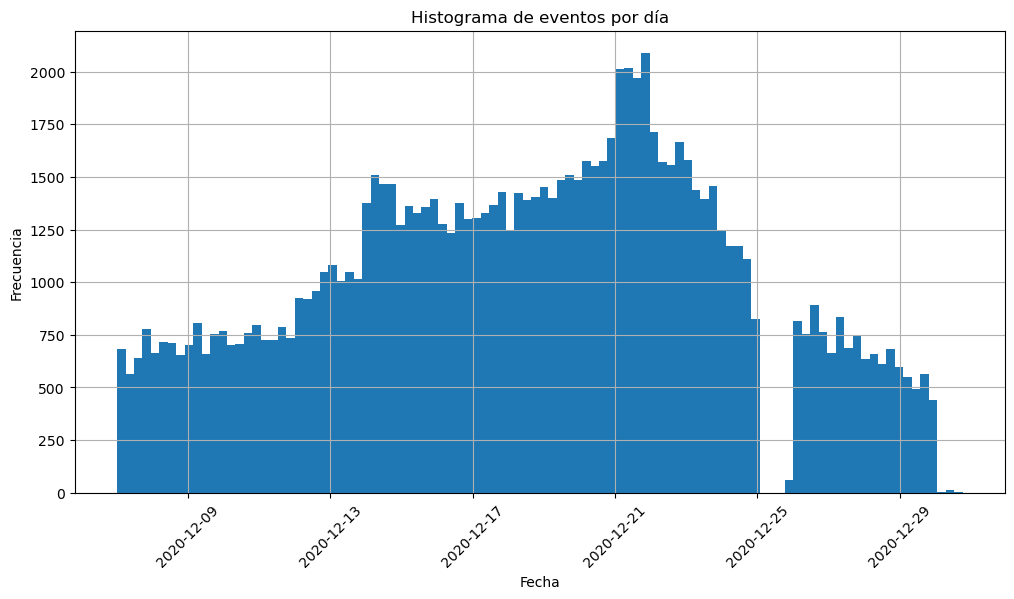

In [7]:
# ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima.
print(f"Fecha mínima: {df['event_dt'].min()}")
print(f"Fecha máxima: {df['event_dt'].max()}")

# Traza un histograma por fecha y hora
plt.figure(figsize=(12, 6))
df['event_dt'].hist(bins=100)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.title('Histograma de eventos por día')
plt.xticks(rotation=45)
plt.show()

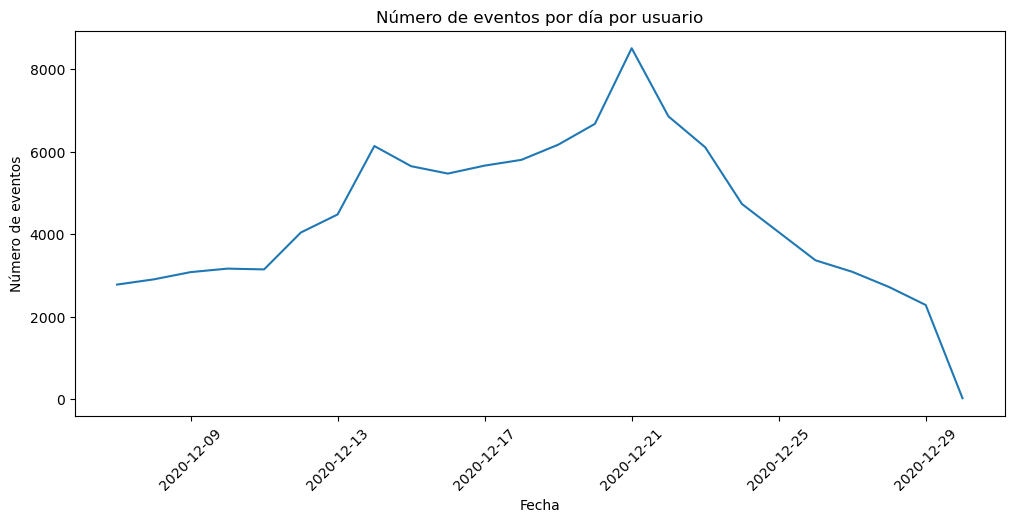

In [8]:
# Contar eventos por día (grafica alterna)

events_per_day = df.groupby("event_date")["user_id"].count()

# Graficar
plt.figure(figsize=(12, 5))
sns.lineplot(data=events_per_day)
plt.xlabel("Fecha")
plt.ylabel("Número de eventos")
plt.title("Número de eventos por día por usuario")
plt.xticks(rotation=45)
plt.show()

#### Se observa que hay una mayor cantidad de eventos los dias previos a navidad, mientras que en navidad se observa una dismunucion total de eventos. 

#### Esto sugiere que las personas se anticipan en sus compras previo a eventos como lo es navidad.



<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hace falta calcular y graficar los eventos a lo largo del tiempo
</div>

In [9]:
# ¿Cuántos eventos hay en los registros?
print('Nombres de los eventos:')
for event in df['event_name'].unique():
    print(event)
print()
print('Número de eventos:', len(df['event_name'].unique()))

Nombres de los eventos:
purchase
product_cart
product_page
login

Número de eventos: 4


In [10]:
print('Número de Usuarios:', len(df['user_id'].unique()))

Número de Usuarios: 13638


In [11]:
# ¿Cuál es el promedio de eventos por usuario?

print(
    f"El promedio de eventos por usuario es de: {df.groupby('user_id')['event_name'].count().mean():.2f} eventos")

El promedio de eventos por usuario es de: 7.54 eventos


In [12]:
#  Que eventos hay en los registros y su frecuencia de suceso. (ordenados por frecuencia)
df.groupby('event_name')['event_date'].agg('count').sort_values()

event_name
product_cart    14318
purchase        14854
product_page    28961
login           44705
Name: event_date, dtype: int64

Observamos que la accion mas comun es hacer un login y ver un producto.

Llama mi atencion que es mas comun realizar una compra que agregar un producto al carrito. ¿Es esto una situacion normal o representa un error en los datos? se sugiere investigar al respecto


In [13]:
# Número de eventos por usuario en el grupo A
eventByUser_A = df[df['group'] == 'A'].groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
print('El número de eventos por usuario en el grupo A es:')
print(eventByUser_A)

# Número de eventos por usuario en el grupo B
eventByUser_B = df[df['group'] == 'B'].groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
print('\nEl número de eventos por usuario en el grupo B es:')
print(eventByUser_B)

El número de eventos por usuario en el grupo A es:
event_name
login           7873
product_page    5208
purchase        2682
product_cart    2483
Name: user_id, dtype: int64

El número de eventos por usuario en el grupo B es:
event_name
login           6204
product_page    3986
product_cart    2037
purchase        2008
Name: user_id, dtype: int64


In [14]:
# ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
print('la proporcion es:')
print(eventByUser_B/eventByUser_A)

la proporcion es:
event_name
login           0.788010
product_cart    0.820379
product_page    0.765361
purchase        0.748695
Name: user_id, dtype: float64


#### Observamos que la proporcion de usuarios es similar entre grupos, 

In [15]:
# - ¿Hay usuarios que están presentes en ambas muestras?

# Encontrar usuarios en el grupo A
usuarios_grupo_a = set(df[df['group'] == 'A']['user_id'])

# Encontrar usuarios en el grupo B
usuarios_grupo_b = set(df[df['group'] == 'B']['user_id'])

# Encontrar la intersección de usuarios en ambos grupos
usuarios_comunes = usuarios_grupo_a.intersection(usuarios_grupo_b)

print(f"Número de usuarios en ambos grupos: {len(usuarios_comunes)}")
print('Se observa que hay usuarios en ambos grupos \nVale la pena investigar si es algo esperado')

print(f'Numero total de usuarios {df['user_id'].count()}')

Número de usuarios en ambos grupos: 441
Se observa que hay usuarios en ambos grupos 
Vale la pena investigar si es algo esperado
Numero total de usuarios 102838



    - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
- La unica particularidad de momento es que hay ususarios repetidos entre muestras (Se eliminan de manera provicional a menos que se indique que es algo esperado)

In [16]:
# Filtrar los usuarios que estan en ambos grupos
df = df[~df['user_id'].isin(usuarios_comunes)]

In [17]:
# definimos una funcion para uso posterior

def funnl_ord(data, funnel):
    """ Se genera una funcion para establecer el orden de eventos. 
    Se toman dos argumentos; el origen de los datos y el funnel ordenado de los eventos"""

    funn_eve = pd.DataFrame(columns=['event', 'unique_users', 'proportion'])

    for i in range(len(funnel) - 1):
        current_event = funnel[i]
        next_event = funnel[i + 1]

        current_users = data[data['event_name'] ==
                             current_event]['user_id'].unique()
        next_users = data[data['event_name'] ==
                          next_event]['user_id'].unique()

        proportion = len(set(next_users) & set(
            current_users)) / len(current_users)

        new_row = pd.DataFrame({'event': [next_event], 'unique_users': [
                               len(next_users)], 'proportion': [proportion]})
        funn_eve = pd.concat([funn_eve, new_row], ignore_index=True)
    print(funn_eve)

In [18]:
# Estudia la conversión en las diferentes etapas del embudo.
funnel = ['login', 'product_page', 'product_cart', 'purchase']

funnl_ord(df, funnel)

          event unique_users  proportion
0  product_page         8652    0.655703
1  product_cart         4268    0.322469
2      purchase         4436    0.333646


C:\Users\Branchbit Reclu\AppData\Local\Temp\ipykernel_16560\3387612809.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  funn_eve = pd.concat([funn_eve, new_row], ignore_index=True)


#### Se observa que solo un tercio de los usuarios llegan a el pago

In [19]:
# se separa por grupos para ver si existe alguna  diferencia.

funnl_ord(df[df['group'] == 'A'], funnel)
print()
funnl_ord(df[df['group'] == 'B'], funnel)

          event unique_users  proportion
0  product_page         4937    0.664290
1  product_cart         2357    0.315374
2      purchase         2555    0.338142

          event unique_users  proportion
0  product_page         3715    0.644630
1  product_cart         1911    0.331898
2      purchase         1881    0.328100


C:\Users\Branchbit Reclu\AppData\Local\Temp\ipykernel_16560\3387612809.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  funn_eve = pd.concat([funn_eve, new_row], ignore_index=True)
C:\Users\Branchbit Reclu\AppData\Local\Temp\ipykernel_16560\3387612809.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  funn_eve = pd.concat([funn_eve, new_row], ignore_index=True)


#### no se observa que las propociones cambien considerablemente entre grupos

In [20]:
#  ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?
def user_full_trip(data, funnel, show=True):
    """ Se genera una funcion para dar el porcentaje de usuarios que recorren el funnel completo
    desde el inicio hasta el final"""

    # Encuentra los usuarios que realizaron el primer evento
    first_event_users = data[data['event_name']
                             == funnel[0]]['user_id'].unique()
    # Encuentra los usuarios que realizaron el último evento (pago)
    last_event_users = data[data['event_name']
                            == funnel[-1]]['user_id'].unique()
    # Calcula el porcentaje de usuarios que realizaron todo el viaje
    percentage_full_journey = len(set(last_event_users) & set(
        first_event_users)) / len(first_event_users) * 100

    if show:
        print(
            f"El porcentaje de usuarios que hace todo el viaje desde su primer evento hasta el pago es: {percentage_full_journey:.2f}%")
    else:
        return percentage_full_journey


user_full_trip(df, funnel)

El porcentaje de usuarios que hace todo el viaje desde su primer evento hasta el pago es: 33.60%


In [21]:
# se separa por grupos para ver si existe alguna  diferencia.

user_full_trip(df[df['group'] == 'A'], funnel)
print()
user_full_trip(df[df['group'] == 'B'], funnel)

El porcentaje de usuarios que hace todo el viaje desde su primer evento hasta el pago es: 34.36%

El porcentaje de usuarios que hace todo el viaje desde su primer evento hasta el pago es: 32.62%


#### Nuevamente no obervamos que existan diferencias entre grupos mas que del 2%. En todo caso, el porcentaje de usuarios ya sea dividido en grupos o en general, que llega a pagar es muy bajo.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No es buena práctica tener tantos procesos en una sóla celda, la ventaja de los notebooks es que se puede usar cada celda para hacer cada paso facilitando así la comprensión del proceso. Además, la conversión no está calculada corredctamente, deberías tomar el primer evento `loging` como el punto de partida para calcular el resto, por ejemplo, para la conversión en purchase sería `# usuarios purchase / # usuarios login`
</div>

In [22]:
# Generamos una funcion para difernecias entre grupos:
def t_dif_gpo(gpo1: pd.DataFrame, gpo2: pd.DataFrame, P: float = 0.05) -> None:
    t_stat_evento, p_value_evento = stats.ttest_ind(
        gpo1, gpo2, equal_var=False)
    print('El resultado de la prueba es:')
    print(f"Estadístico t: {t_stat_evento:.4F}, Valor p: {p_value_evento:.4F}")

    if p_value_evento < P:
        print("Existen diferencias significativas.")
    else:
        print("No hay diferencias significativas.")

In [23]:
gpoA = df[(df['group'] == 'A') & (df['event_name'] == 'purchase')]['user_id'].value_counts()
gpoB = df[(df['group'] == 'B') & (df['event_name'] == 'purchase')]['user_id'].value_counts()

In [24]:
t_dif_gpo(gpoA,gpoB)

El resultado de la prueba es:
Estadístico t: 2.4296, Valor p: 0.0152
Existen diferencias significativas.


In [25]:
from statsmodels.stats.proportion import proportions_ztest

# Número de usuarios que realizaron el evento final (purchase) en cada grupo
purchase_A = eventByUser_A['purchase']
purchase_B = eventByUser_B['purchase']

# Número total de usuarios que realizaron el evento inicial (login) en cada grupo
login_A = eventByUser_A['login']
login_B = eventByUser_B['login']

# Proporciones de conversión
conversion_A = purchase_A / login_A
conversion_B = purchase_B / login_B

# Datos para la prueba z
successes = [purchase_A, purchase_B]
totals = [login_A, login_B]

# Prueba z
z_stat, p_value = proportions_ztest(successes, totals)

print(f"Estadístico z: {z_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Existen diferencias estadísticamente significativas entre las proporciones de conversión.")
else:
    print("No hay diferencias estadísticamente significativas entre las proporciones de conversión.")

Estadístico z: 2.1240
Valor p: 0.0337
Existen diferencias estadísticamente significativas entre las proporciones de conversión.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una prueba estadística no te puede dar cómo resultado `nan` eso quiere decir que el módulo que lo calculo no está recibiendo los datos adecuados, y se debería aplicar para la conversión de cada evento. La conversión que se ha calculado aquí no es correcta ya que tienes un 100% cómo si todos los usuarios tuviesen un 100% de conversión y eso no es acertado
</div>

### Aunque la diferencia entre grupos es del 3% las pruebas estadisticas indican que efectivamente la estrategia empleada resulta en un aumento de la convercion del grupo B respecto al A

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Las conclusiones deben ser más detalladas, debes resumir los hallazgos más importantes vistos a lo largo de **todo** el notebook y no sólo de la parte final
</div>

### Conlcusiones finales:

- Los usuarios muestran un comportamiento de previcion para las compras antes de eventos importantes (e.g. navidad)
- La tasa de conversion general es muy baja, solo un tercio de los usuarios completan el funnel.
- Las estrategias empleadas para el grupo B incrementan la conversion. Se sugiere seguir explorando estrategias en esa direccion para poder aumentar la convercion y incrementar las ventas. 